## Install and import necessary packages

In [1]:
# You need to run this cell (code) only once!
!pip install tsfel

In [2]:
import tsfel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.gridspec as gridspec

# Import dataset

In [31]:
df=pd.read_excel(r'C:\Users\emhm\source\repos\ML viz\ML viz\AEPrec_sABRe_data_TP8sABR_BILATERAL_2021-Jun-24_14.59.57_MOD_OK.xlsx', sheet_name='L500dBnHL55', index_col=0)
dft=df.transpose()
dft.drop(['cond_wa (nV)','contra_wa (nV)','rare_wa (nV)', 'Fmp_win (msec)', 'Fmp', 'p', 'nSweeps', 'RN (nV)', 'Display filter', 'Nominal rate (Hz)', 'Jitter distribution', 'Jitter degree', 'wave V peak (msec, nV)', 'wave V trough (msec, nV)', 'Condition', 'ABR wave V latency (msec)', 'ABR wave V amplitude (nV)'], inplace=True, axis=1)
dft=dft.loc[:, dft.columns.notna()]
dft

Time (msec),ipsi_wa (nV)
0.020833,7.217339
0.041667,8.781087
0.062500,10.215491
0.083333,11.599972
0.104167,12.816255
...,...
19.916667,28.773983
19.937500,29.527588
19.958333,30.286467
19.979167,30.911253


<function matplotlib.pyplot.show(close=None, block=None)>

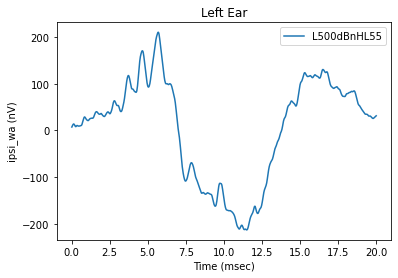

In [26]:
plt.plot(dft, label='L500dBnHL55')
plt.xlabel('Time (msec)')
plt.ylabel('ipsi_wa (nV)')
plt.title('Left Ear')
plt.legend()
plt.show

## Feature extraction using TSFEL package

In [29]:
cfg = tsfel.get_features_by_domain()

feature_mitdb = tsfel.time_series_features_extractor(cfg, dft, fs=150)

*** Feature extraction started ***
60



*** Feature extraction finished ***


In [28]:
feature_mitdb

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,1.154231e+07,728.463772,1.154231e+07,3.960988,192.0,768.0,-125.03273,99.672813,0.001042,0.002083,...,1.245634,20.07588,101.395399,305.223909,695.267476,1314.465495,2157.231971,3163.468031,4236.126158,2.0


### Save the extracted features in a CSV file. This will save your time next time :)

In [36]:
feature_mitdb.to_csv("feature_mitdb.csv")

#### Once you have saved the extracted features, you only need to import them in future and skip the feature extraction. This way life will be easier :)

In [37]:
feature_mitdb = pd.read_csv('feature_mitdb.csv', header='infer')